## To do once I solve this crashing notebook issue

- Put a label on the graph with blue curve the brownian bridge and red curve y=0 
- normalize the graph by plotting sqrt(n)f instead of f 
- plot several functions for different values of n 

My plots to prove it is indeed a brownian bridge 
- pick t_1 randomly and show that B_{t_1}-t_1 B_1 is distributed as a centered Gaussian normal 
- And do one plot for each n to see how it gets closer to a gaussian 
- plot it as a histogram and plot the theorized distribution of a gaussian (in another colour, for comparison)

In [1]:
import numpy as np
import ot #package for optimal transport solver
import matplotlib.pyplot as plt
from helper import *

In [ ]:
np.random.seed(9001)
n=100

X=np.random.uniform(size=n)
Y=np.linspace(1,n,n)/(n+1)

In [ ]:
C=np.zeros((n,n))#cost matrix, C_ij is the distance between X_i and Y_j

for i in range(n):
    for j in range(n):
        C[i,j]=np.abs(X[i]-Y[j])**2#we're in dimension 1, okay, in higher dimension will need the norm

In [ ]:
a=np.ones(n)/n
b=np.ones(n)/n

P_test=ot.emd(a, b, C, numItermax=100000, log=False, center_dual=True, numThreads=1, check_marginals=True)

In [ ]:
f=np.zeros(n+2) #interpolating function

sigma=np.zeros(n)
X_p=np.zeros(n)

for i in range(n):
    index=np.argwhere(P_test[i,:]>0)
    X_p[index[0,0]]=X[i]


for i in range(0,n):
    f[i+1]=Y[i]-X_p[i]

In [ ]:
z=np.linspace(0,1,n+2) #list of increments
plt.plot(z,np.sqrt(n)*f, label="y=f_n(x)") 
plt.axhline(y=0, color='r', linestyle='--', label="y=0")
plt.show()

### Trying to save as csv

In [23]:
a=[1,2,3]

np.savetxt("test.csv", a, delimiter = ",")

In [26]:
arr = np.loadtxt("test.csv", delimiter=",", dtype=float)

In [27]:
print(arr)

[1. 2. 3.]


In [30]:
type(arr[0])

numpy.float64

## Checking if it is a brownian bridge

In [ ]:
#checking if it is indeed a brownian bridge

In [2]:
n=500

In [8]:
np.random.seed(9001) #fixing seed for reproducibility
t_1=np.random.randint(1,n+1,1)[0] #outputs one random index in range(size(f_n)) excluding t_1=0 and t_1=n+2
print(t_1)

58


In [4]:
B_t_1=np.zeros(n) #the value of the brownian process at time t_1 for different realisations of X

for i in range(n):
    B_t=f_n(n,i) #for reproducibility we use fixed seeds in [0:99]
    B_t_1[i]=B_t[t_1] 

The value for t_1 in [0,1] is 0.11553784860557768 hence the theorized variance of the data distribution is 0.10218885414517229


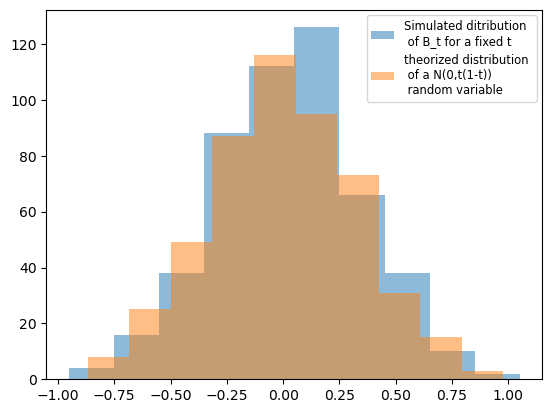

In [12]:
#should look like a centered normal gaussian variable with mean 0 and variance t_1(1-t_1)
plt.hist(B_t_1, bins=10, label="Simulated ditribution \n of B_t for a fixed t", alpha=0.5)

#adapting t_1 to make it belong in [0,1]
norm_t=t_1/(n+2)
std=np.sqrt(norm_t*(1-norm_t))
print("The value for t_1 in [0,1] is", norm_t, "hence the theorized variance of the data distribution is", norm_t*(1-norm_t))

#theorized distribution of a centered normal gaussian variable with mean 0 and variance t_1(1-t_1)
np.random.seed(9001)
normal=np.random.randn(n+2)*std
plt.hist(normal, bins=10, label="theorized distribution \n of a N(0,t(1-t)) \n random variable", alpha=0.5)

plt.legend(loc="upper right", fontsize="small")
plt.show()

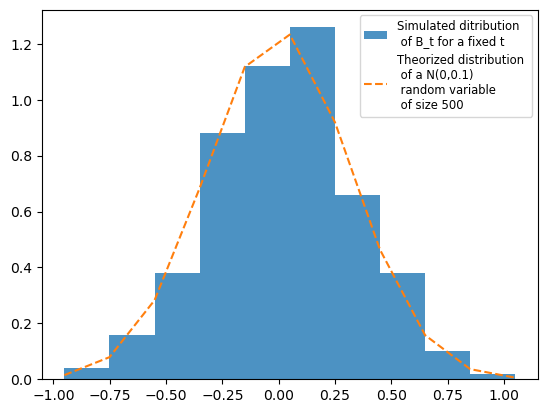

In [22]:
#should look like a centered normal gaussian variable with mean 0 and variance t_1(1-t_1)
_, bins, _=plt.hist(B_t_1, density=True, label="Simulated ditribution \n of B_t for a fixed t", alpha=0.8)

#adapting t_1 to make it belong in [0,1]
norm_t=t_1/(n+2)
std=np.sqrt(norm_t*(1-norm_t))

#theorized distribution of a centered normal gaussian variable with mean 0 and variance t_1(1-t_1)
y = ((1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * (1 / std * bins)**2))
plt.plot(bins, y, '--', label="Theorized distribution \n of a N(0,{}) \n random variable \n of size {}".format(np.round(std**2,2), n))

plt.legend(loc="upper right", fontsize="small")
plt.show()